# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_23387/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

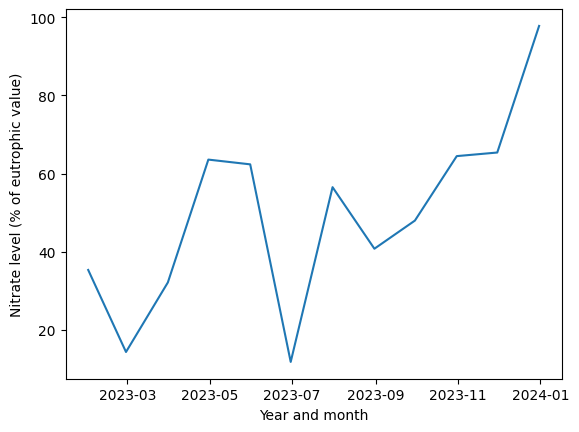

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_23387/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

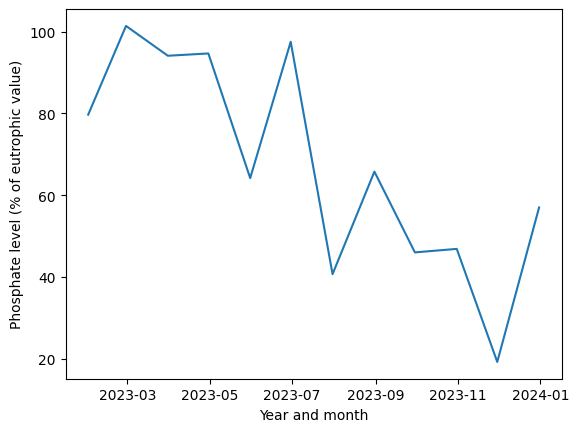

In [4]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

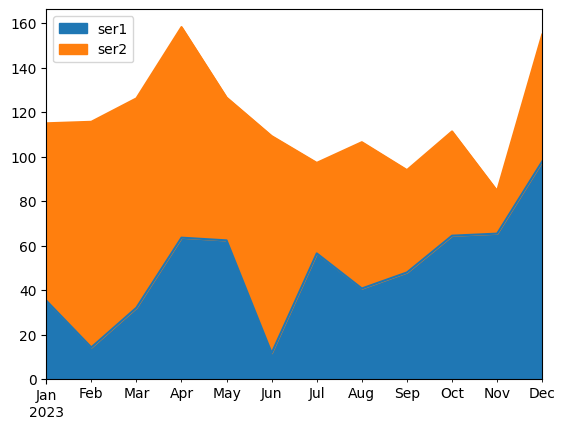

In [5]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [6]:
# This is the dataset for U.S. Energy Generation (2001–2022) 

us_energy = pd.read_csv("/Users/sohan/Documents/Data/archive/organised_Gen.csv", encoding='latin-1')

us_energy = us_energy.drop(columns=['Unnamed: 0'])

# Check the basic information of the dataset
print(us_energy.info())

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sohan/Documents/Data/archive/organised_Gen.csv'

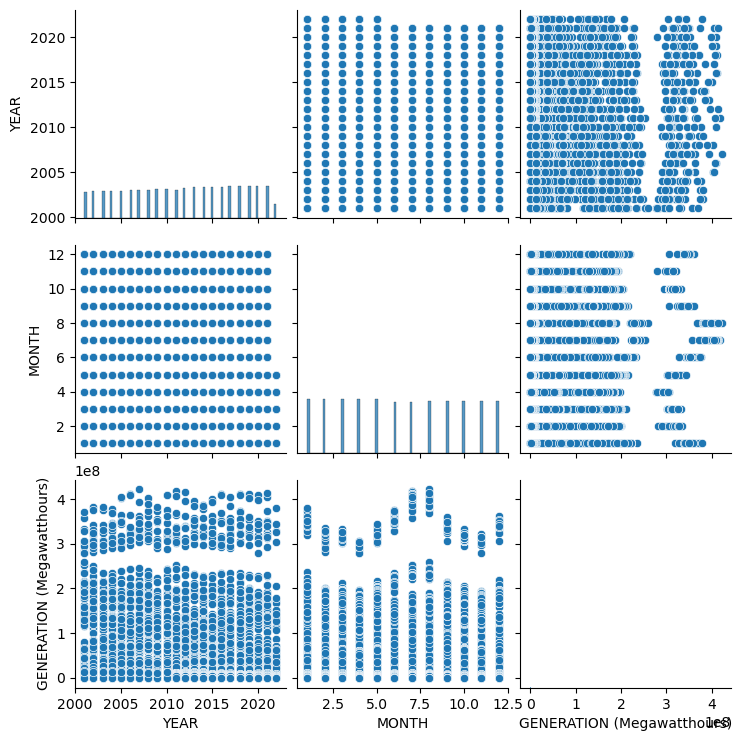

In [ ]:
#only include numeric columns

us_energy_num = us_energy.select_dtypes(include=['number'])

sns.pairplot(us_energy_num)

In [ ]:
print("Correlations:", us_energy_num.corr())

Correlations:                                 YEAR     MONTH  GENERATION (Megawatthours)
YEAR                        1.000000 -0.036776                   -0.007144
MONTH                      -0.036776  1.000000                    0.001455
GENERATION (Megawatthours) -0.007144  0.001455                    1.000000


Based on the analysis above, there seems to be not much correlation between any of the volumns in this dataset. 

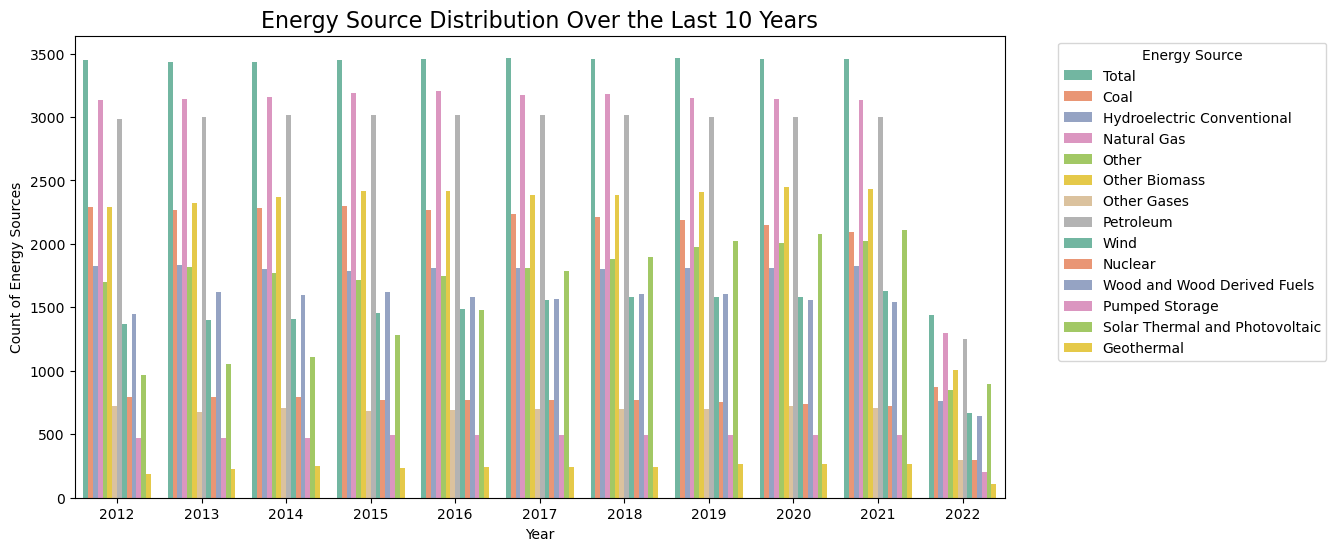

In [ ]:
us_energy2 = us_energy[['YEAR','ENERGY SOURCE']]

# Get the most recent year in the dataset
latest_year = us_energy2['YEAR'].max()

# Filter for the last 10 years
us_energy_last_10 = us_energy2[us_energy2['YEAR'] >= latest_year - 10]

# Set figure size
plt.figure(figsize=(12, 6))

# Create a count plot for 'ENERGY SOURCE' by 'YEAR' (last 10 years)
sns.countplot(data=us_energy_last_10, x='YEAR', hue='ENERGY SOURCE', palette="Set2")

# Add titles and labels
plt.title('Energy Source Distribution Over the Last 10 Years', size=16)
plt.xlabel('Year')
plt.ylabel('Count of Energy Sources')
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


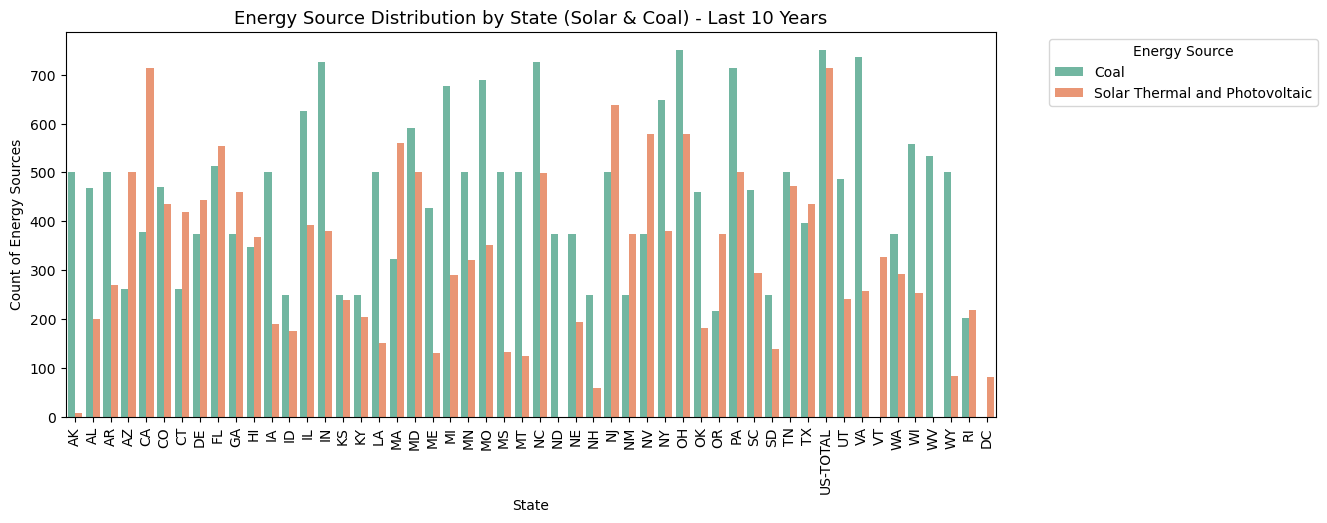

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for last 5 years
latest_year = us_energy['YEAR'].max()
us_energy_last_5 = us_energy[us_energy['YEAR'] >= latest_year - 10]

# Keep only selected energy sources
selected_sources = ['Solar Thermal and Photovoltaic', 'Coal']
us_energy_filtered = us_energy_last_5[us_energy_last_5['ENERGY SOURCE'].isin(selected_sources)]

# Set figure size
plt.figure(figsize=(12, 5))

# Use countplot to visualize the filtered dataset
ax = sns.countplot(data=us_energy_filtered, x='STATE', hue='ENERGY SOURCE', palette='Set2')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add titles and labels
plt.title('Energy Source Distribution by State (Solar & Coal) - Last 10 Years', size=13)
plt.xlabel('State')
plt.ylabel('Count of Energy Sources')

# Manually create the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


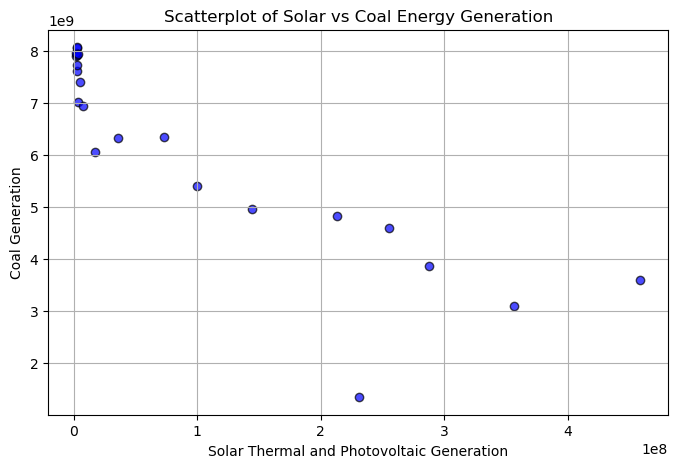

In [ ]:
# Filtering for Solar and Coal energy sources
filtered_df = us_energy[us_energy["ENERGY SOURCE"].isin(["Solar Thermal and Photovoltaic", "Coal"])]

# Pivoting data with aggregation to handle duplicates
pivot_df = filtered_df.pivot_table(index="YEAR", columns="ENERGY SOURCE", values="GENERATION (Megawatthours)", aggfunc="sum")

# Dropping any years where we don't have both Solar and Coal data
pivot_df.dropna(inplace=True)

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(pivot_df["Solar Thermal and Photovoltaic"], pivot_df["Coal"], color='blue', alpha=0.7, edgecolors='black')
plt.xlabel("Solar Thermal and Photovoltaic Generation")
plt.ylabel("Coal Generation")
plt.title("Scatterplot of Solar vs Coal Energy Generation")
plt.grid(True)
plt.show()



# print()

In [ ]:
#This is the dataset for Global Renewable Energy Production (2000–2022) 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ren_energy = pd.read_csv("/Users/sohan/Documents/Data/IRENA_RenewableEnergy_Statistics_2000-2022.csv", encoding='latin-1')

# Check the basic information of the dataset
print(ren_energy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35193 entries, 0 to 35192
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               35193 non-null  object 
 1   Sub-region                           35193 non-null  object 
 2   Country                              35193 non-null  object 
 3   ISO3 code                            35193 non-null  object 
 4   M49 code                             35193 non-null  int64  
 5   RE or Non-RE                         35193 non-null  object 
 6   Group Technology                     35193 non-null  object 
 7   Technology                           35193 non-null  object 
 8   Producer Type                        35193 non-null  object 
 9   Year                                 35193 non-null  int64  
 10  Electricity Generation (GWh)         35193 non-null  float64
 11  Electricity Installed Capaci

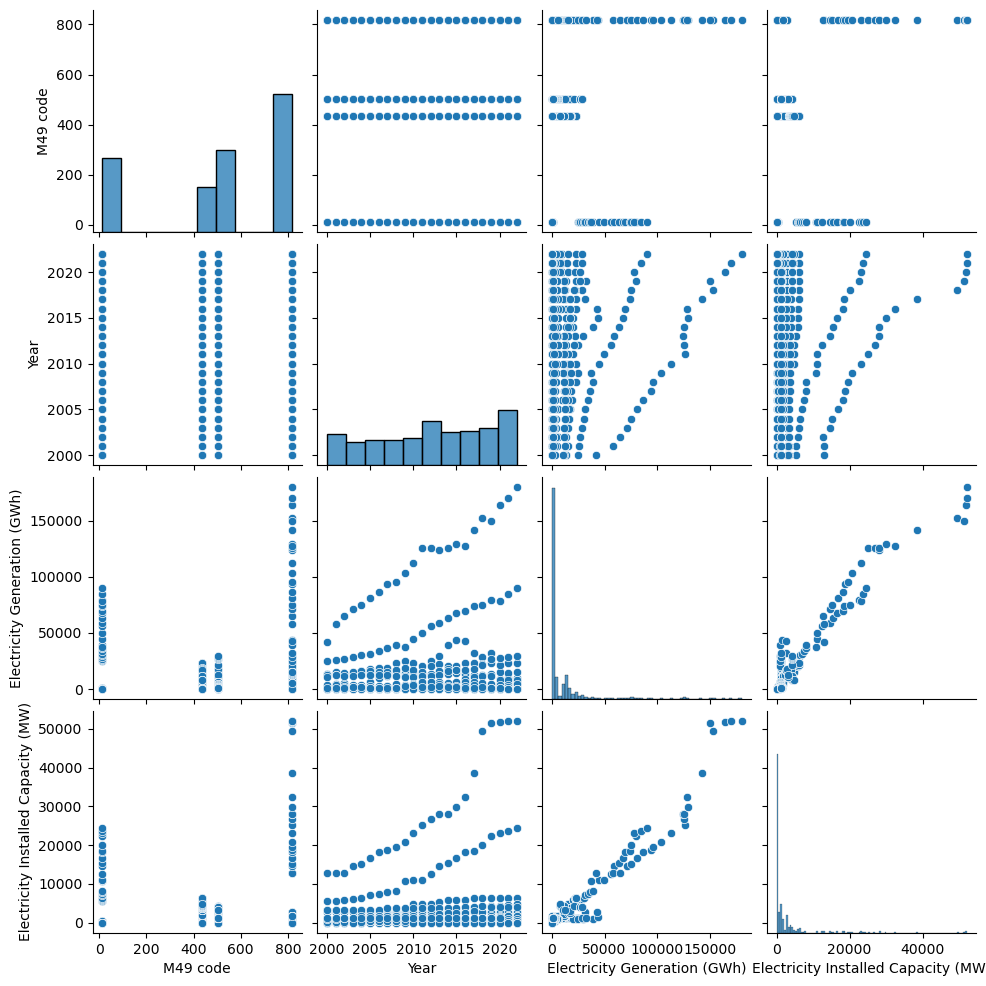

In [ ]:
#only include numeric columns

ren_energy_num = ren_energy.select_dtypes(include=['number'])

sample_ren = ren_energy_num.head(500)

sns.pairplot(sample_ren)

In [ ]:
print("Correlations:", ren_energy_num.corr())

Correlations:                                      M49 code      Year  \
M49 code                             1.000000  0.006546   
Year                                 0.006546  1.000000   
Electricity Generation (GWh)         0.016382 -0.000913   
Electricity Installed Capacity (MW)  0.011128  0.012387   

                                     Electricity Generation (GWh)  \
M49 code                                                 0.016382   
Year                                                    -0.000913   
Electricity Generation (GWh)                             1.000000   
Electricity Installed Capacity (MW)                      0.958447   

                                     Electricity Installed Capacity (MW)  
M49 code                                                        0.011128  
Year                                                            0.012387  
Electricity Generation (GWh)                                    0.958447  
Electricity Installed Capacity (MW)         

There is strong positive correlation between electricity installed capacity and electricity generation. 

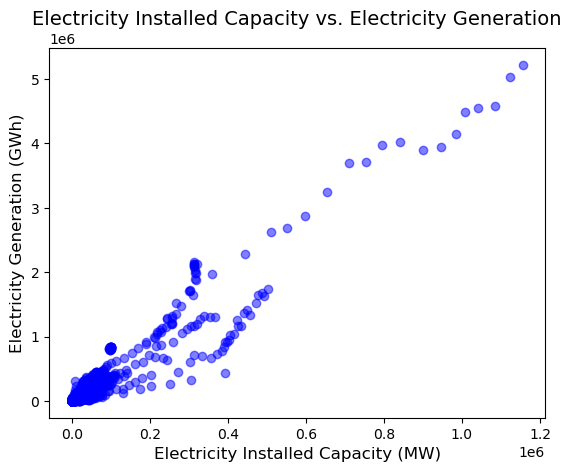

In [ ]:
# Drawing a separate scatterplot of Electricity Generation (GWh) and Electricity Installed Capacity (MW) as they are highly correlated.

ren_col = ren_energy[['Electricity Installed Capacity (MW)', 'Electricity Generation (GWh)']]

plt.scatter(ren_col['Electricity Installed Capacity (MW)'], ren_col['Electricity Generation (GWh)'], c='blue', alpha=0.5)

# Adding labels and title
plt.title('Electricity Installed Capacity vs. Electricity Generation', fontsize=14)
plt.xlabel('Electricity Installed Capacity (MW)', fontsize=12)
plt.ylabel('Electricity Generation (GWh)', fontsize=12)

# Display plot
plt.show()


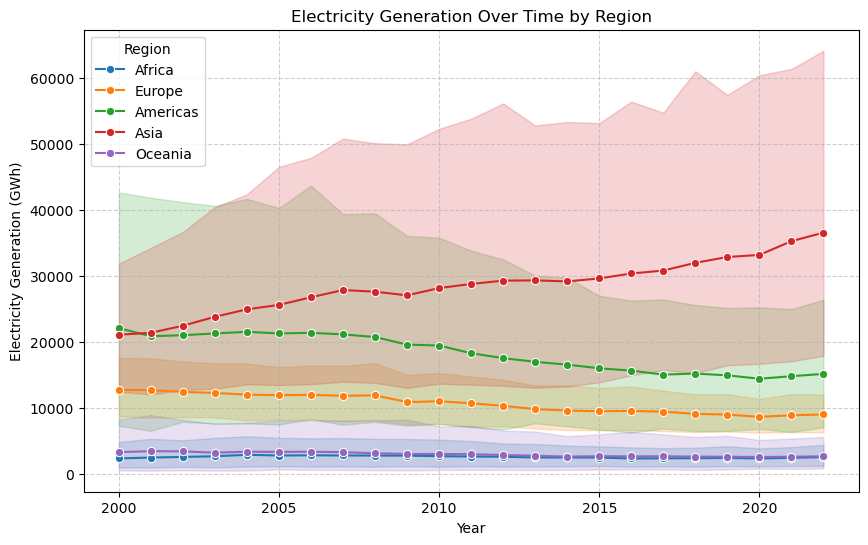

In [ ]:
ren_col1 = ren_energy[['Region', 'Year', 'Electricity Generation (GWh)']]

# Sort values by Year for proper plotting
ren_col1 = ren_col1.sort_values(by='Year')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=ren_col1, x='Year', y='Electricity Generation (GWh)', hue='Region', marker='o')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Electricity Generation (GWh)")
plt.title("Electricity Generation Over Time by Region")
plt.legend(title="Region")
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


There is a clear trend of electricity generation in Asia region over last couple decades. Electricity installed capacity and electricity generation are highly correlated to the point that it's not valuable here because we can safely assume high electricty installation is related to higher electricity generation. 

In [ ]:
#This is the dataset for Evolution of Modern Renewable Energy (1965–2021)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

energy_evo = pd.read_csv("/Users/sohan/Documents/Data/archive (1)/02 modern-renewable-energy-consumption.csv", encoding='latin-1')

# Check the basic information of the dataset
print(energy_evo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5610 non-null   object 
 1   Code                     4299 non-null   object 
 2   Year                     5610 non-null   int64  
 3   Geo Biomass Other - TWh  5466 non-null   float64
 4   Solar Generation - TWh   5442 non-null   float64
 5   Wind Generation - TWh    5445 non-null   float64
 6   Hydro Generation - TWh   5603 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 306.9+ KB
None


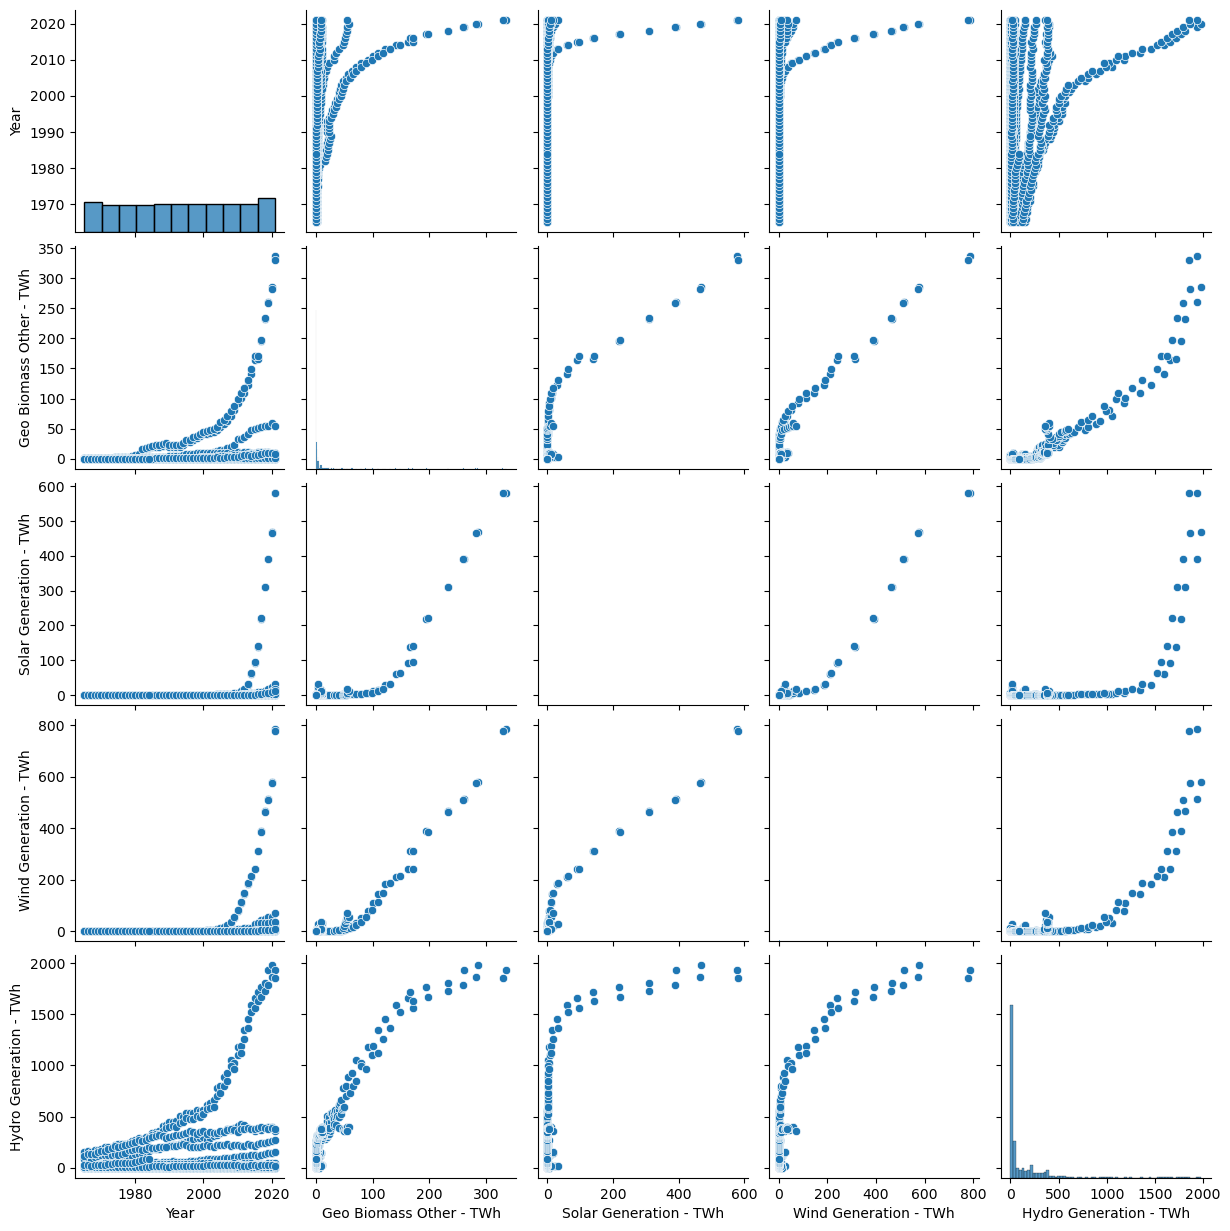

In [ ]:
#only include numeric columns

energy_evo_num = energy_evo.select_dtypes(include=['number'])

energy_evo_num = energy_evo_num.head(1000)

sns.pairplot(energy_evo_num)

Most variables are positively correlated with each other. It is interesting to see exponential upward generation correlation in some and plateauing or even slight downward trend in others.Also, looking at the generation over the years, all the energy generation sources had exponential growth in recent years, so much so that they look like outliers on the graphs.   

/var/folders/n2/v897k8r94yqgdjswsd7pz_580000gn/T/ipykernel_23366/1340617942.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=energy_evo1, x='Entity', y='Wind Generation - TWh', palette='coolwarm')


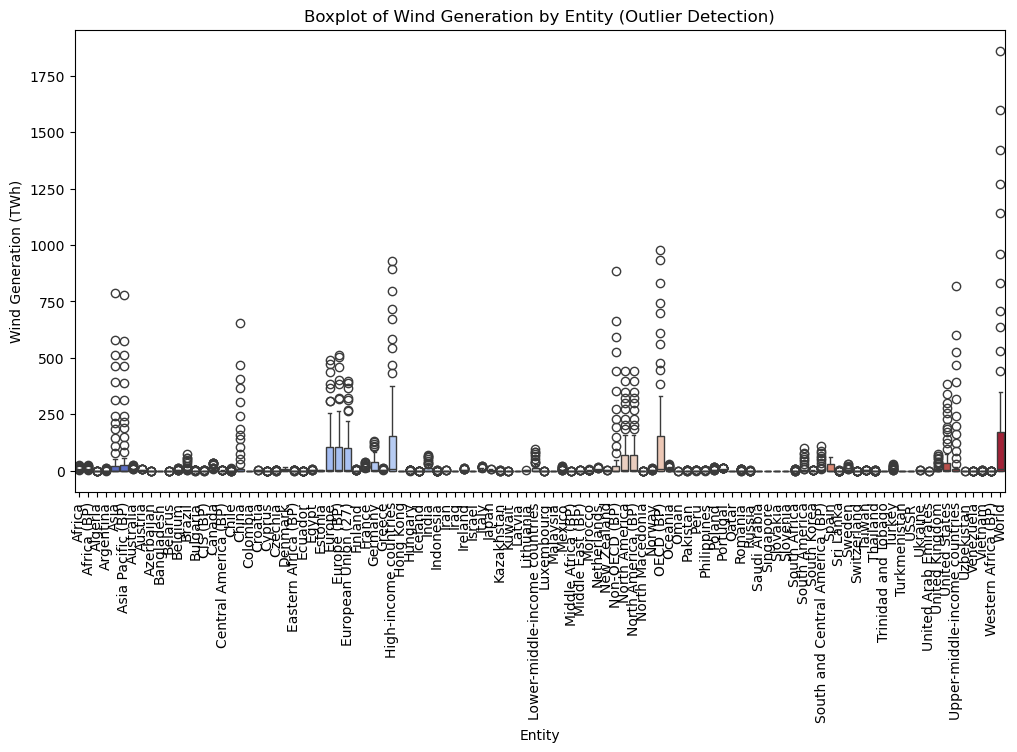

In [ ]:
#Create a box plot to show outliers

energy_evo1 = energy_evo[['Entity', 'Year', 'Wind Generation - TWh']]

import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=energy_evo1, x='Entity', y='Wind Generation - TWh', palette='coolwarm')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Labels and title
plt.xlabel('Entity')
plt.ylabel('Wind Generation (TWh)')
plt.title('Boxplot of Wind Generation by Entity (Outlier Detection)')

# Show plot
plt.show()


<Figure size 1000x600 with 0 Axes>

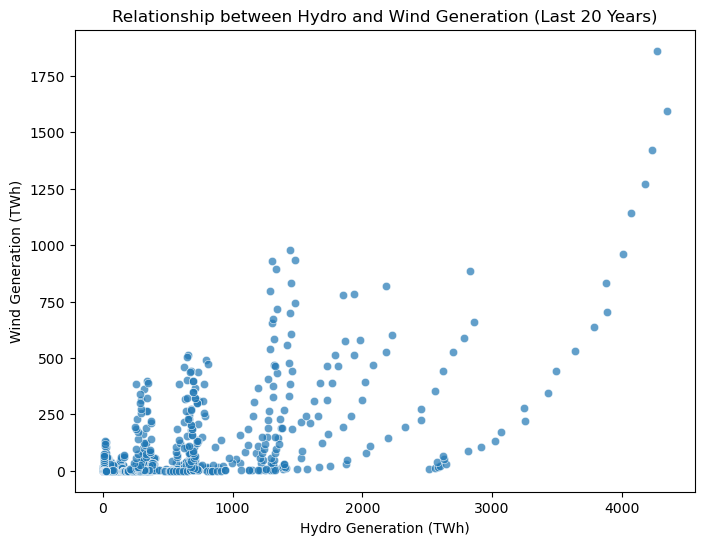

In [ ]:
energy_evo2 = energy_evo[['Hydro Generation - TWh', 'Year', 'Wind Generation - TWh']]

# Plot scatter plot
plt.figure(figsize=(10, 6))

# Filter data for the last 20 years
energy_evo2_filtered = energy_evo[energy_evo['Year'] >= energy_evo['Year'].max() - 25][['Hydro Generation - TWh', 'Wind Generation - TWh']]

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=energy_evo2_filtered, x='Hydro Generation - TWh', y='Wind Generation - TWh', alpha=0.7)

# Labels and title
plt.xlabel('Hydro Generation (TWh)')
plt.ylabel('Wind Generation (TWh)')
plt.title('Relationship between Hydro and Wind Generation (Last 20 Years)')

# Show plot
plt.show()


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

/var/folders/n2/v897k8r94yqgdjswsd7pz_580000gn/T/ipykernel_23366/3747161326.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Electricity Installed Capacity (MW)', y='Region', data=ren_col2, palette=colors)
/var/folders/n2/v897k8r94yqgdjswsd7pz_580000gn/T/ipykernel_23366/3747161326.py:11: UserWarning: The palette list has more values (35193) than needed (5), which may not be intended.
  sns.barplot(x='Electricity Installed Capacity (MW)', y='Region', data=ren_col2, palette=colors)


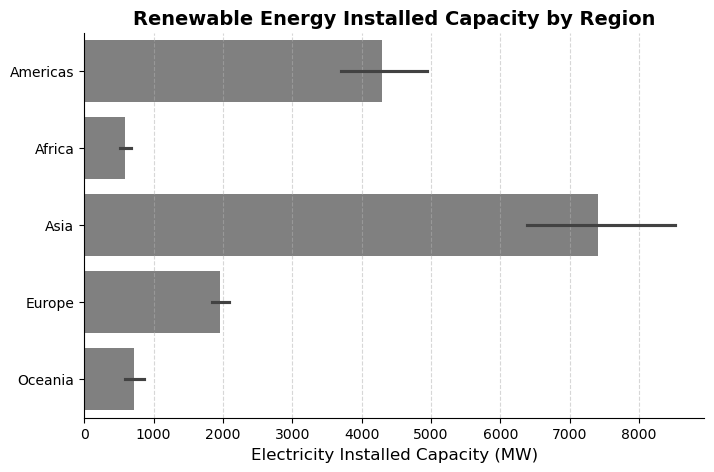

In [ ]:
ren_col2 = ren_energy[['Region', 'Year', 'Electricity Installed Capacity (MW)']]

# Sort data by capacity
ren_col2 = ren_col2.sort_values(by='Electricity Installed Capacity (MW)', ascending=True)

# Define colors (highlight highest value)
colors = ['gray' if x < ren_col2['Electricity Installed Capacity (MW)'].max() else 'blue' for x in ren_col2['Electricity Installed Capacity (MW)']]

# Create the horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Electricity Installed Capacity (MW)', y='Region', data=ren_col2, palette=colors)

# Add labels and title
plt.xlabel("Electricity Installed Capacity (MW)", fontsize=12)
plt.ylabel("")
plt.title("Renewable Energy Installed Capacity by Region", fontsize=14, fontweight='bold')

# Remove unnecessary chart elements (decluttering)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show the plot
plt.show()